In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread_collection, imshow
from skimage.transform import resize,downscale_local_mean

from sklearn.metrics import classification_report

In [2]:
def formatData(size, cats_dir, dogs_dir, dim):
    """ This function reads dataset, separeta a slice (size),
        resize photos (dim) and create labels (0, 1) for respective
        classes. It randomizes positions.
    """
    train_cats = imread_collection(cats_dir)
    train_cats = train_cats[0:size]
    train_cats = np.array(list(map(lambda x: resize(x, (dim,dim,3)),train_cats)))
    y_cats = np.ones((1,len(train_cats)))

    train_dogs = imread_collection(dogs_dir)
    train_dogs = train_dogs[0:size]
    train_dogs = np.array(list(map(lambda x: resize(x, (dim,dim,3)),train_dogs)))
    y_dogs = np.zeros((1,len(train_dogs)))

    X_train = np.concatenate([train_cats, train_dogs])
    
    Y_train = np.concatenate([y_cats, y_dogs], axis = 1)
    

    sample = np.random.choice(range(2*size),2*size, replace = False )
    X_train = X_train[sample]
    Y_train = Y_train[0,sample]

    return X_train, Y_train

In [3]:
#Sigmoid functions
def sigmoid(z):
    return 1/(1+np.exp(-z))

#Train
def logisticRegression(X,Y,maxIterations,eta, verbose = True):
    
    size,m = X.shape
    cost = []
    w = np.zeros((size,1))
    b = 0
    alpha = 0.01
    costi = 1.0 + alpha
    i = 0
    while i < maxIterations or costi<alpha:
    
        if verbose:
            print(f'Epoch:{i+1}/{maxIterations}, Loss: {costi}')
        #Feed Forword 
        Z = sigmoid(np.dot(w.T,X)+b)               
        costi = (-1/m)*np.sum(((Y*np.log(Z)) + (1-Y)*np.log(1-Z)), axis = 1)   
        cost.append(costi)

        #BackPropagation
        dw = (1/m)*(np.dot(X,((Z-Y).T)))
        db = (1/m)*np.sum((Z-Y), axis = 1)
        #Update
        w = w-eta*dw
        b = b-eta*db

        i+=1
    return w, b, cost 

#Predict Data
def pred(w,b, X):
    size, m = X.shape
    yhat = np.zeros((1,m))

    #Feed Forword
    Z = sigmoid(np.dot(w.T,X)+b)  
    for i in range(m):

        if Z[0,i] <= 0.5:
            yhat[0,i] = 0
        else:
            yhat[0,i] = 1

    return yhat
    
def acc(yhat,ytrue):
    return 100 - np.mean(np.abs(yhat - ytrue)) * 100


In [ ]:
#Dataset Cats vs dog

#Train Data path 
cats = 'data\\data\\train\\cat.*.jpg'
dogs = 'data\\data\\train\\dog.*.jpg'
pp = 64
X_train, Y_train = formatData(800, cats, dogs, pp)
X_tr = X_train.reshape(X_train.shape[0],-1).T

w,b,cost = logisticRegression(X_tr,Y_train, 100000,0.001)
yhat_train = pred(w,b,X_tr)


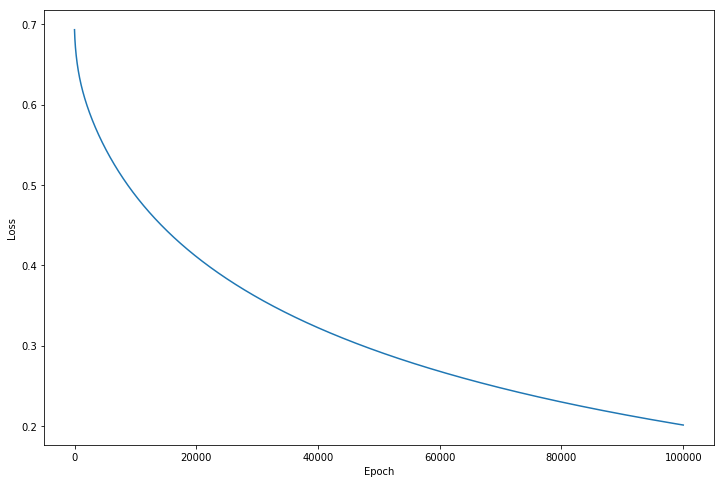

In [6]:
plt.figure(figsize=(12,8))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(cost)

In [7]:
print(f'Train accuracy: {acc(yhat_train, Y_train)}')

Train accuracy: 98.0625


Using a really small dataset just to check it. But it do not represent overall acc over a real testing set!

In [9]:
#Load Small personal test data 5 img
testData = imread_collection('data\\data\\eval\\*.jpeg')
testData = np.array(list(map(lambda x: resize(x, (pp,pp,3)),testData)))
testData = testData.reshape(testData.shape[0],-1).T

In [11]:
y_test = [1,1,1,0,0]
result = pred(w,b,testData)
print(list(map(lambda x: 'Cat' if x == 1 else 'Dog', result[0])))

['Cat', 'Cat', 'Cat', 'Cat', 'Dog']


In [14]:
print(f'Test accuracy: {acc(result, y_test)}')

Test accuracy: 80.0
